## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random

random.seed(42)
np.random.seed(42)

# 1. Loading data

In [2]:
# Load the data
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# Increase maximal displayed columns
pd.options.display.max_columns = 50


In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
data.shape

(21613, 21)

# 2. Basic data exploration

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Count number of unique values in every column (int)
data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [10]:
# Count frequency of the values in different columns (list of ints in descending order)
list(data['bedrooms'].value_counts())

[9824, 6882, 2760, 1601, 272, 199, 38, 13, 13, 6, 3, 1, 1]

In [11]:
list(data['grade'].value_counts())

[8981, 6068, 2615, 2038, 1134, 399, 242, 90, 29, 13, 3, 1]

In [12]:
# Display basic data statistics using .describe()
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
# Display some column statistics
[round(data['sqft_living'].max(), 3), round(data['sqft_living'].min(), 3), round(data['sqft_living'].mean(), 3), round(data['sqft_living'].std(), 3)]

[13540, 290, 2079.9, 918.441]

In [14]:
[round(data['long'].max(), 3), round(data['long'].min(), 3), round(data['long'].mean(), 3), round(data['long'].std(), 3)]

[-121.315, -122.519, -122.214, 0.141]

In [15]:
# Display data types of all columns
def dtype_list(data):
    dtype_list = []
    df1 = pd.DataFrame(data.dtypes).reset_index()
    for i in range(len(df1)):
        if df1.iloc[i, 1] == 'int64':
            dtype_list.append(df1.iloc[i, 0])
        else:
            pass
    return dtype_list
dtype_list1 = dtype_list(data)
dtype_list1.sort()
print(','.join(dtype_list1))

bedrooms,condition,grade,id,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode


# 3. Data selection

In [16]:
# setting DataFrame index to be an `id` column, now .loc and .iloc will have different behavior
data.index = data.id

# dropping `id` column, since now it is an index
data.drop('id', axis=1, inplace=True)

# sort data by index for clarity
data.sort_index(inplace=True)

In [17]:
data.query('(yr_built >= 1969) and (yr_built <= 1974) and (waterfront == 1)')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
121039083,20150206T000000,629000.0,3,1.75,1460,12367,2.0,1,4,4,8,1120,340,1970,0,98023,47.3311,-122.375,1970,18893
1925069066,20140623T000000,1700000.0,3,2.75,2810,18731,2.0,1,4,4,10,2810,0,1974,0,98052,47.6361,-122.093,3120,14810
2923039243,20141113T000000,340000.0,4,1.00,1200,11834,1.0,1,3,3,6,1200,0,1972,0,98070,47.4557,-122.443,1670,47462
3623500408,20150330T000000,2600000.0,3,3.00,3410,16015,2.0,1,4,4,10,2220,1190,1973,0,98040,47.5721,-122.239,3760,16572
5215200010,20140626T000000,663000.0,3,2.50,2480,37843,1.5,1,3,4,8,2480,0,1974,0,98070,47.4003,-122.422,2350,42122
7204200025,20141028T000000,1225000.0,4,2.50,3120,49456,2.0,1,4,4,9,2590,530,1974,1989,98198,47.3535,-122.323,2030,32181


In [18]:
data.query('(bathrooms == 5) and (yr_built == 1998) and (grade == 10)')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2322069010,20141007T000000,1180000.0,5,5.0,3960,94089,2.0,0,0,3,10,3960,0,1998,0,98038,47.38,-122.011,2240,64468


In [19]:
round(data.query('(yr_built == 1962)')['price'].mean(), 3)

436715.314

In [20]:
data.query('(grade > 9)')['bathrooms'].median()

3.25

# 4. Creating new columns
---

In [21]:
# Create `was_renovated` column. Bool column (0, 1) indicating whether the house was renovated.
data['was_renovated'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [22]:
# Create a `sqft_tot_area` column (sum of all columns with `sqft_` prefix) using any method above
data['sqft_tot_area'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement'] + data['sqft_living15'] + data['sqft_lot15']

In [23]:
# Create a new column `sqm_tot_area` using `sqft_tot_area` and the fact that 1 foot = 0.3048 meters
data['sqm_tot_area'] = data['sqft_tot_area'].apply(lambda x: x * 0.3048**2)

In [24]:
# Create a new column `sqm_aver_floor_area` by dividing total area (in meters) by number of floors
data['sqm_aver_floor_area'] = data['sqm_tot_area'] / data['floors']

In [25]:
def price_cat_split(x):
    if x >= 0 and x <= 20:
        return 1
    elif x > 20 and x <= 40:
        return 2
    elif x > 40 and x <= 60:
        return 3
    elif x > 60 and x <= 80:
        return 4
    else:
        return 5

In [26]:
# Create a new column `price_cat` by splitting a `price` into 5 ([1..5]) distinct intervals: 0 < x <=20%,
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.
data['price_cat'] = (data['price'] / data['price'].max() * 100).apply(price_cat_split)

In [27]:
# Create a new bool column `high_class` it is True if the house has grade >= 9 and condition >= 4
data['high_class'] = data[['grade', 'condition']].apply(lambda x: True if x[0] >= 9 and x[1] >= 4 else False, axis=1)

In [28]:
# Using mask or .query syntax select rows/columns (float)

# Q16.1 What is the average price of the house of the high_class(=True)?
# A16.1: 1146802.328
# Q16.2 What is the average total_area (in meters) of the house from highest price category?
# Q16.3 What is the maximal number of floors amongst houses with the lowest price category?
# A16.3: 3.500
# Q16.4 What is the most frequent zipcode amongst houses with the lowest price category?
# Q16.5 What is the minimal number of bathrooms in houses with high_class=True?


In [29]:
round(data.query('high_class == True')['price'].mean(), 3)

1146802.328

In [30]:
data.query('price_cat == 1')['floors'].max()

3.5

# 5. Basic data processing
---

In [31]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

In [32]:
# Extract and store `year`
data['year'] = data.date.dt.year

In [33]:
# Extract and store `month`
data['month'] = data.date.dt.month

In [34]:
# Extract and store `day`
data['day'] = data.date.dt.day

In [35]:
# Extract and store `weekday`
data['weekday'] = data.date.dt.weekday

In [36]:
# Create a new column `house_age_10` - the age of the house in full decades (e.g. 9 year old house - 0, 21 year old house - 2),
# using `yr_built` and 'year' columns
data['house_age_10'] = (data['year'] - data['yr_built']) // 10

In [37]:
# Drop column `date`
data = data.drop(['date'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2015,4,22,2,2
1000102,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2014,9,16,1,2
1200019,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,0,54637,5075.943396,5075.943396,1,False,2014,5,8,3,6
1200021,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,0,68193,6335.337007,6335.337007,1,False,2014,8,11,0,6
2800031,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,0,22069,2050.277190,1366.851460,1,False,2015,4,1,2,8


# 6. Groupby
---

In [38]:
# `price_by_class` groupby `high_class` and compute median `price`.
data['price_by_class'] = data['high_class'].map(data.groupby('high_class')['price'].median())
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10,price_by_class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2015,4,22,2,2,440000.0
1000102,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2014,9,16,1,2,440000.0
1200019,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,0,54637,5075.943396,5075.943396,1,False,2014,5,8,3,6,440000.0
1200021,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,0,68193,6335.337007,6335.337007,1,False,2014,8,11,0,6,440000.0
2800031,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,0,22069,2050.277190,1366.851460,1,False,2015,4,1,2,8,440000.0


In [39]:
# `price_by_weekday` groupby `weekday` and compute median price.
data['price_by_weekday'] = data['weekday'].map(data.groupby('weekday')['price'].median())
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10,price_by_class,price_by_weekday
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000102,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2015,4,22,2,2,440000.0,453000.0
1000102,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2014,9,16,1,2,440000.0,449950.0
1200019,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,0,54637,5075.943396,5075.943396,1,False,2014,5,8,3,6,440000.0,442500.0
1200021,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,0,68193,6335.337007,6335.337007,1,False,2014,8,11,0,6,440000.0,453000.0
2800031,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,0,22069,2050.277190,1366.851460,1,False,2015,4,1,2,8,440000.0,453000.0


In [40]:
# `price_by_yr_month_`(median, std) groupby `year`, `month` and compute median and std `price`.
data = pd.merge(data, data.groupby(['year', 'month'])['price'].agg('median').reset_index(), on=['year', 'month'], how='left').rename(columns={'price_x': 'price', 'price_y': 'price_by_yr_month_median'})
data = pd.merge(data, data.groupby(['year', 'month'])['price'].agg('std').reset_index(), on=['year', 'month'], how='left').rename(columns={'price_x': 'price', 'price_y': 'price_by_yr_month_std'})
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10,price_by_class,price_by_weekday,price_by_yr_month_median,price_by_yr_month_std
0,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2015,4,22,2,2,440000.0,453000.0,476500.0,369928.879358
1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2014,9,16,1,2,440000.0,449950.0,450000.0,372531.666484
2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,0,54637,5075.943396,5075.943396,1,False,2014,5,8,3,6,440000.0,442500.0,465000.0,356502.789521
3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,0,68193,6335.337007,6335.337007,1,False,2014,8,11,0,6,440000.0,453000.0,442100.0,370583.428226
4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,0,22069,2050.277190,1366.851460,1,False,2015,4,1,2,8,440000.0,453000.0,476500.0,369928.879358


In [41]:
# `price_by_grade_age_`(median, std) groupby `grade`, `house_age` and compute median and std `price`.
data = pd.merge(data, data.groupby(['grade', 'house_age_10'])['price'].agg('median').reset_index(), on=['grade', 'house_age_10'], how='left').rename(columns={'price_x': 'price', 'price_y': 'price_by_grade_age_median'})
data = pd.merge(data, data.groupby(['grade', 'house_age_10'])['price'].agg('std').reset_index(), on=['grade', 'house_age_10'], how='left').rename(columns={'price_x': 'price', 'price_y': 'price_by_grade_age_std'})
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10,price_by_class,price_by_weekday,price_by_yr_month_median,price_by_yr_month_std,price_by_grade_age_median,price_by_grade_age_std
0,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2015,4,22,2,2,440000.0,453000.0,476500.0,369928.879358,299725.0,107333.645663
1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,1,False,2014,9,16,1,2,440000.0,449950.0,450000.0,372531.666484,299725.0,107333.645663
2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,0,54637,5075.943396,5075.943396,1,False,2014,5,8,3,6,440000.0,442500.0,465000.0,356502.789521,648475.0,312970.587514
3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,0,68193,6335.337007,6335.337007,1,False,2014,8,11,0,6,440000.0,453000.0,442100.0,370583.428226,405000.0,170384.049342
4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,0,22069,2050.277190,1366.851460,1,False,2015,4,1,2,8,440000.0,453000.0,476500.0,369928.879358,307500.0,125008.962617


# 7. Building a regression model
---

In [42]:
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
# Drop all generated features which used price column, e.g. price_by_year, price_cat.
data_for_model = data.drop(['price_cat', 'high_class', 'price_by_class', 'price_by_weekday', 'price_by_yr_month_median', 'price_by_yr_month_std', 'price_by_grade_age_median', 'price_by_grade_age_std'], axis=1).reset_index()
data_for_model.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,year,month,day,weekday,house_age_10
0,0,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,2015,4,22,2,2
1,1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0,23549,2187.773689,1093.886844,2014,9,16,1,2
2,2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,0,54637,5075.943396,5075.943396,2014,5,8,3,6
3,3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,0,68193,6335.337007,6335.337007,2014,8,11,0,6
4,4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,0,22069,2050.277190,1366.851460,2015,4,1,2,8


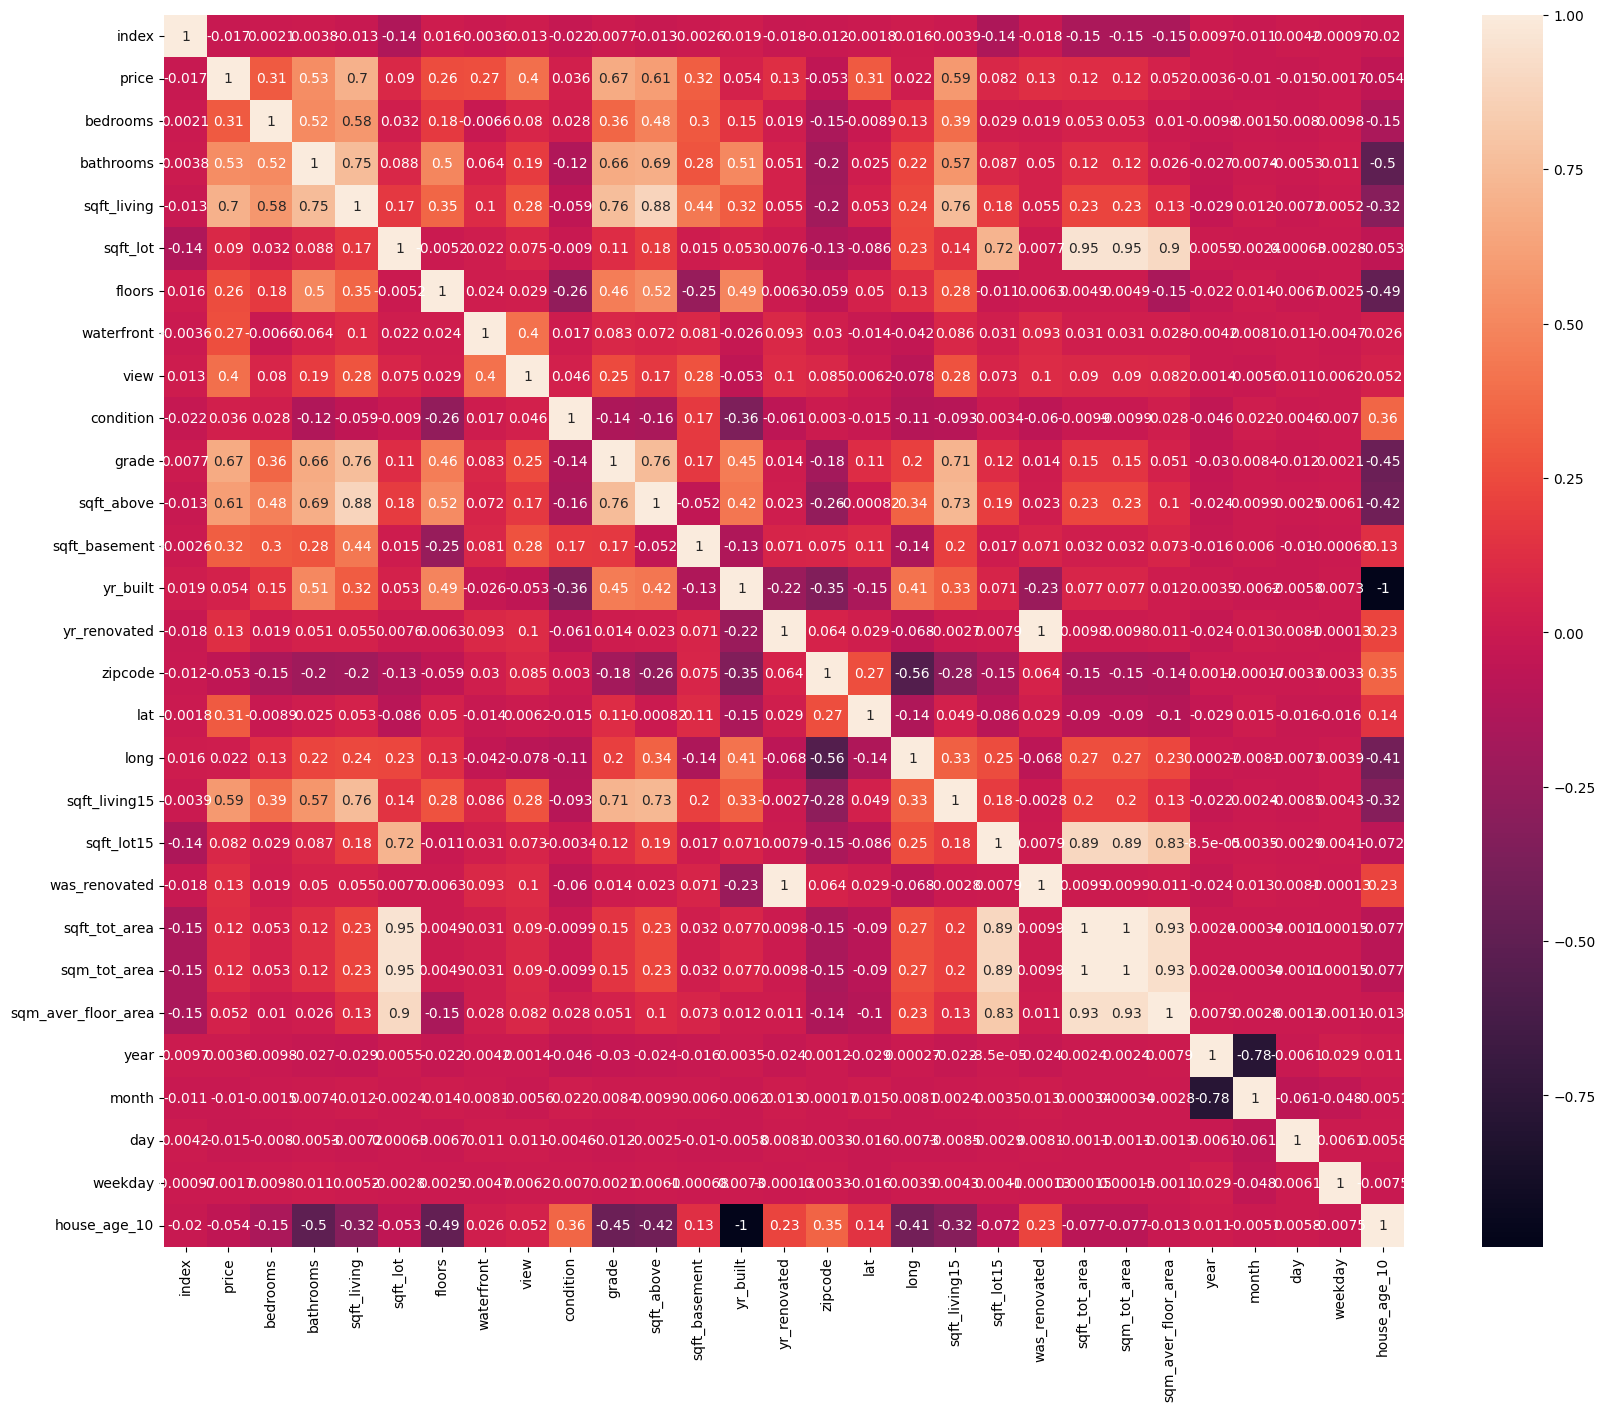

In [44]:
# Correlation Matrix
import seaborn as sn
import matplotlib.pyplot as plt

correlation_matrix = data_for_model.corr()
fig, ax = plt.subplots(figsize=(20, 16))
sn.heatmap(correlation_matrix, annot=True)
plt.plot()
plt.show()

In [45]:
data_for_model = data_for_model.drop(['index', 'yr_renovated', 'year', 'month', 'day', 'weekday', 'house_age_10', 'was_renovated', 'sqft_tot_area', 'sqm_tot_area', 'sqm_aver_floor_area'], axis=1)
data_for_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,98002,47.3262,-122.214,2060,7316
1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,98002,47.3262,-122.214,2060,7316
2,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,98166,47.4444,-122.351,2590,21891
3,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,98166,47.4434,-122.347,2250,20023
4,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,98168,47.4783,-122.265,1290,10320


In [46]:
le = LabelEncoder()
categorical_features = ['bathrooms', 'floors', 'yr_built', 'zipcode'] 
for col in categorical_features:
    data[col] = le.fit_transform(data[[col]])

c:\Users\79179\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\79179\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\79179\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\79179\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.p

In [47]:
data_for_model.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
X = data_for_model.drop(['price'], axis=1)

In [49]:
y = data_for_model.price

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
print(f'Train size: {X_train.shape[0]}')
print(f'Test size: {X_test.shape[0]}')

Train size: 14480
Test size: 7133


In [52]:
# Linear Regression with l2 regularization
Ridge_regressor = Ridge()

In [53]:
# Decision Tree Regression
Tree_regressor = DecisionTreeRegressor()

In [54]:
# k Nearest Neaibors Regression
KNeighbors_regressor = KNeighborsRegressor()

### Optimal hyperparameters for a Ridge Regression
---

In [55]:
ridge_reg_parameters = {'alpha': np.logspace(-1, 1, 200)}
grid_search_cv_ridge = GridSearchCV(Ridge_regressor, ridge_reg_parameters, cv=5)

In [56]:
grid_search_cv_ridge.fit(X_train, y_train)
grid_search_cv_ridge.best_params_

{'alpha': 4.247571552536899}

### Optimal hyperparameters for a Decision Tree Regression
---

In [57]:
tree_reg_parameters = {'max_depth': range(1, 20)}
grid_search_cv_tree = GridSearchCV(Tree_regressor, tree_reg_parameters, cv=5)

In [58]:
grid_search_cv_tree.fit(X_train, y_train)
grid_search_cv_tree.best_params_

{'max_depth': 10}

### Optimal hyperparameters for kNN Regression
---

In [59]:
kneighbors_reg_parameters = {'n_neighbors': range(1, 20)}
grid_search_cv_kNN = GridSearchCV(KNeighbors_regressor, kneighbors_reg_parameters, cv=5)

In [60]:
grid_search_cv_kNN.fit(X_train, y_train)
grid_search_cv_kNN.best_params_

{'n_neighbors': 9}

In [61]:
# Compute train and test mean squared error for your best models (list of float).

# Q25.1 Train, test MSE using linear regression with l2 regularization
# Q25.2 Train, test MSE using decision tree regression
# Q25.3 Train, test MSE using k nearest neighbours regression

### MSE using Ridge Regression with l2 regularization
---

In [62]:
Ridge_best_reg = grid_search_cv_ridge.best_estimator_
y_pred_Ridge_train = Ridge_best_reg.predict(X_train)
y_pred_Ridge_test = Ridge_best_reg.predict(X_test)

In [63]:
print('Train MSE:', np.round(mean_squared_error(y_train, y_pred_Ridge_train, squared=True) / mean_squared_error(y_train, np.zeros(len(y_train)), squared=True), 3))
print('Test MSE:', np.round(mean_squared_error(y_test, y_pred_Ridge_test) / mean_squared_error(y_test, np.zeros(len(y_test))), 3))

Train MSE: 0.099
Test MSE: 0.087


### MSE using Decision Tree Regression
---

In [64]:
Tree_best_reg = grid_search_cv_tree.best_estimator_
y_pred_Tree_train = Tree_best_reg.predict(X_train)
y_pred_Tree_test = Tree_best_reg.predict(X_test)


In [65]:
print('Train MSE:', np.round(mean_squared_error(y_train, y_pred_Tree_train, squared=True) / mean_squared_error(y_train, np.zeros(len(y_train)), squared=True), 3))
print('Test MSE:', np.round(mean_squared_error(y_test, y_pred_Tree_test) / mean_squared_error(y_test, np.zeros(len(y_test))), 3))

Train MSE: 0.026
Test MSE: 0.057


### MSE using kNN Regression
---

In [66]:
kNN_best_reg = grid_search_cv_kNN.best_estimator_
y_pred_kNN_train = kNN_best_reg.predict(X_train)
y_pred_kNN_test = kNN_best_reg.predict(X_test)

In [67]:
print('Train MSE:', np.round(mean_squared_error(y_train, y_pred_kNN_train, squared=True) / mean_squared_error(y_train, np.zeros(len(y_train)), squared=True), 3))
print('Test MSE:', np.round(mean_squared_error(y_test, y_pred_kNN_test) / mean_squared_error(y_test, np.zeros(len(y_test))), 3))

Train MSE: 0.129
Test MSE: 0.142


In [68]:
# R2 score using Linear Regression with l2 regularization
r2_score_Ridge = [r2_score(y_train, y_pred_Ridge_train), r2_score(y_test, y_pred_Ridge_test)]
r2_score_Ridge

[0.694383229210259, 0.7083247705820572]

In [69]:
# R2 score using Decision Tree Regression
r2_score_Tree = [r2_score(y_train, y_pred_Tree_train), r2_score(y_test, y_pred_Tree_test)]
r2_score_Tree

[0.9197950054295441, 0.8068977418726742]

In [70]:
# R2 score using k Nearest Neighbours Regression
r2_score_kNN = [r2_score(y_train, y_pred_kNN_train), r2_score(y_test, y_pred_kNN_test)]
r2_score_kNN

[0.6017744045871212, 0.5229158040337416]

In [71]:
# Q27 Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).

In [72]:
Tree_feature_importances = pd.DataFrame({'importance': Tree_best_reg.feature_importances_}, index=list(X_test))
Tree_feature_importances.sort_values('importance', ascending=False).iloc[:5, :]

,importance
grade,0.371120
sqft_living,0.272998
lat,0.154240
long,0.068864
waterfront,0.026851


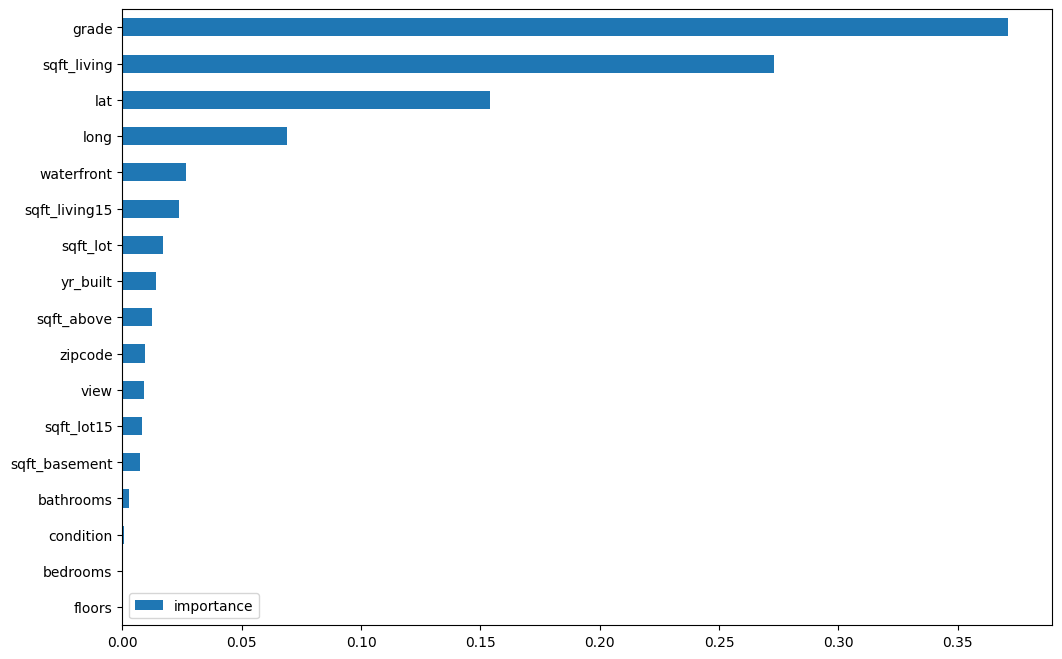

In [73]:
Tree_feature_importances = Tree_feature_importances.sort_values('importance').plot(kind='barh', figsize=(12, 8))